# Abstract - Determine which attributes will indicate  an inedible mushroom.

# Introduction - Mushrooms have been a cornerstone of my culinary experience. A professor once emphasized avoiding black gill mushrooms but purple are ok. I thought this project would provide an opportunity to either support his claim or offer a more reliable indicator. 

##  + Is gill color a reliable indicator of poisionous mushrooms

## + Is another mushroom attribute a better indicator of consumability

## + Train a classification model on mushroom dataset

## EDA

In [18]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [19]:
col_Names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape' ,'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_table(url , sep=",", names=col_Names)

In [21]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [22]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col]) 
    
data_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [24]:
data_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


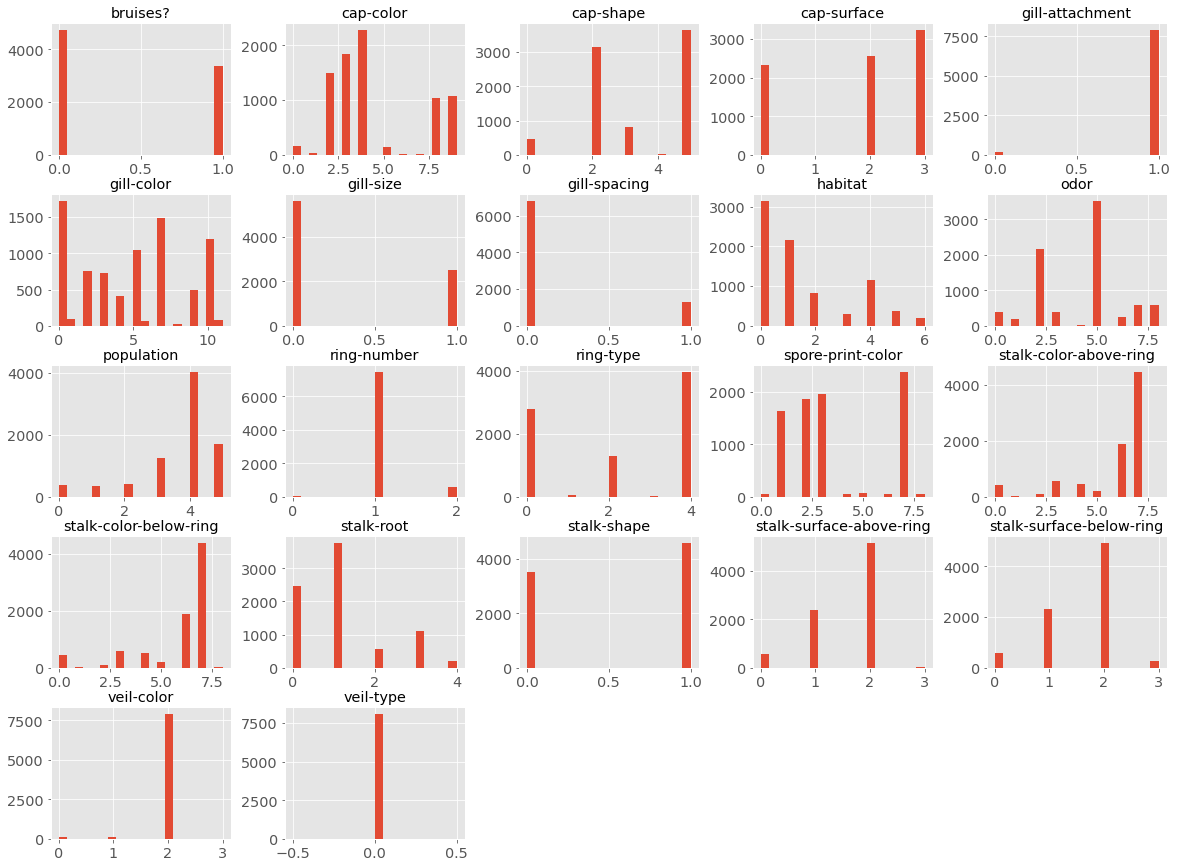

In [48]:
X.hist(bins=20, figsize=(20,15))
plt.show()

In [25]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Modeling

In [26]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [27]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)


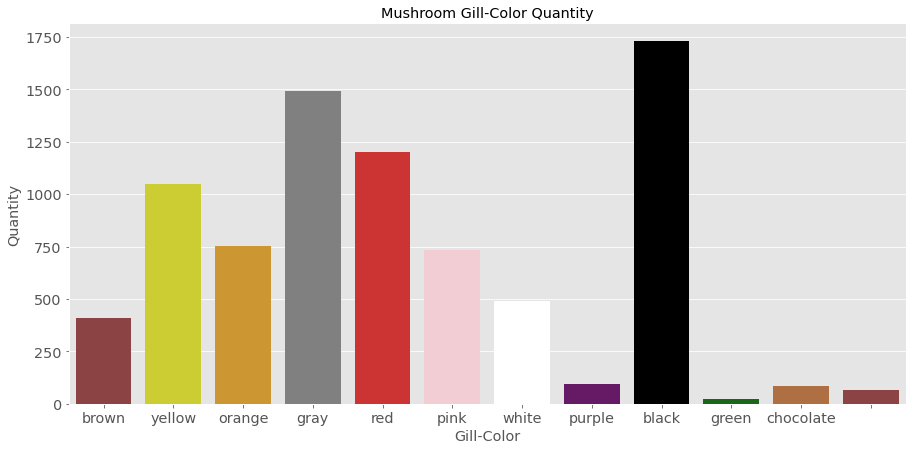

In [28]:
color_dict = {"brown":"n","yellow":"y", "orange":"o", "gray":"g", "red":"e","pink":"p",
              "white":"w", "purple":"u", "black":"k", "green":"r", "chocolate":"h"}
plot_col(col='gill-color', color=color_dict.keys(), labels=color_dict)

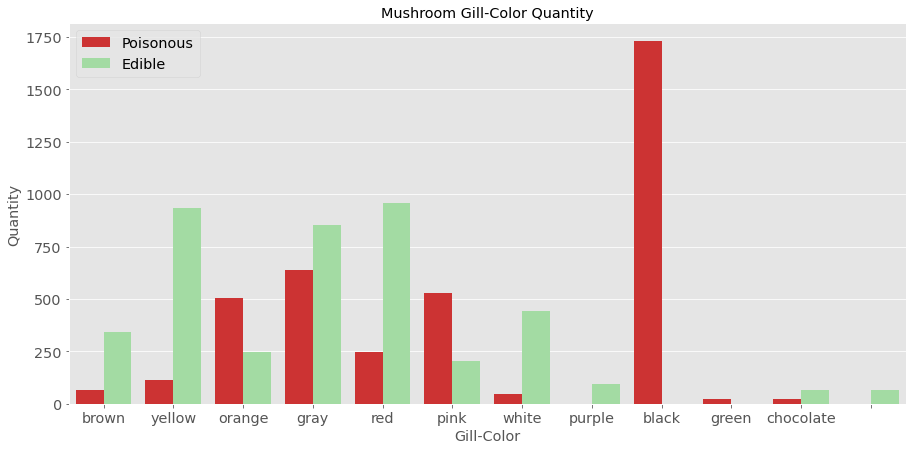

In [29]:
plot_col(col='gill-color', hue='class', labels=color_dict)

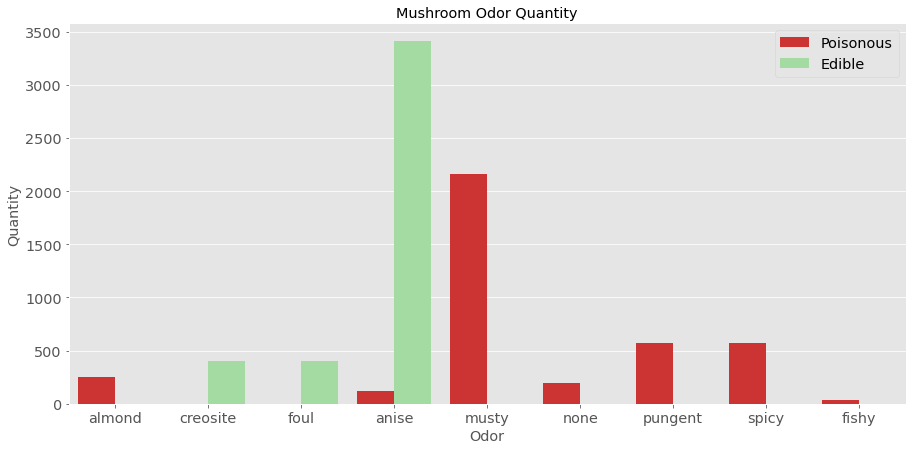

In [30]:
odor_dict = {"almond":"a","creosite":"c","foul":"f","anise":"1","musty":"m","none":"n","pungent":"p","spicy":"s","fishy":"y"}
plot_col(col='odor', hue='class', labels=odor_dict)

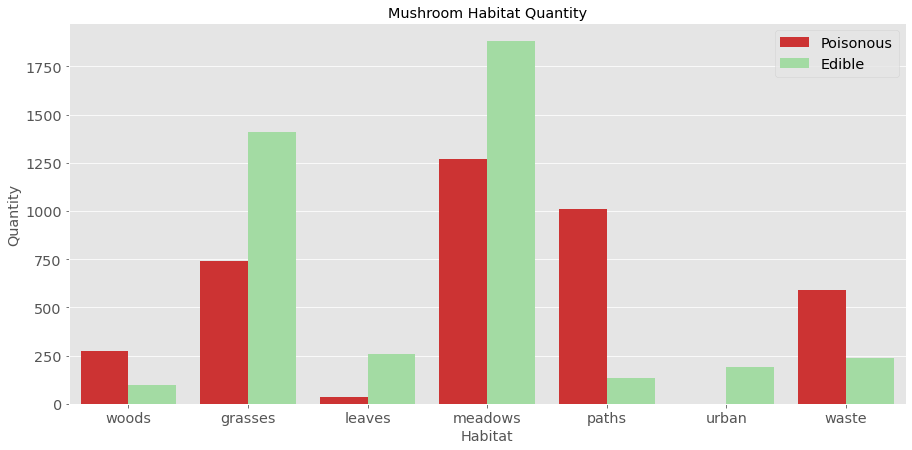

In [31]:
habitat_dict = {"woods":"d","grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w"}
plot_col(col='habitat', hue='class', labels=habitat_dict)

In [32]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [41]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [42]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

Poisonous = 1
Edible = 0

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Ideal: 0.864
> folds=2, accuracy=0.864 (0.856,0.872)
> folds=3, accuracy=0.867 (0.853,0.877)
> folds=4, accuracy=0.863 (0.844,0.880)
> folds=5, accuracy=0.865 (0.850,0.895)
> folds=6, accuracy=0.866 (0.831,0.916)
> folds=7, accuracy=0.867 (0.839,0.888)
> folds=8, accuracy=0.866 (0.816,0.912)
> folds=9, accuracy=0.865 (0.829,0.928)
> folds=10, accuracy=0.868 (0.820,0.920)
> folds=11, accuracy=0.868 (0.758,0.934)
> folds=12, accuracy=0.866 (0.738,0.928)
> folds=13, accuracy=0.862 (0.753,0.922)
> folds=14, accuracy=0.867 (0.792,0.931)
> folds=15, accuracy=0.865 (0.776,0.939)
> folds=16, accuracy=0.867 (0.794,0.935)
> folds=17, accuracy=0.864 (0.746,0.949)
> folds=18, accuracy=0.866 (0.768,0.946)
> folds=19, accuracy=0.862 (0.755,0.943)
> folds=20, accuracy=0.863 (0.760,0.940)
> folds=21, accuracy=0.866 (0.729,0.957)
> folds=22, accuracy=0.864 (0.739,0.978)
> folds=23, accuracy=0.861 (0.705,0.977)
> folds=24, accuracy=0.866 (0.738,0.952)
> folds=25, accuracy=0.861 (0.725,0.950)
> folds=26,

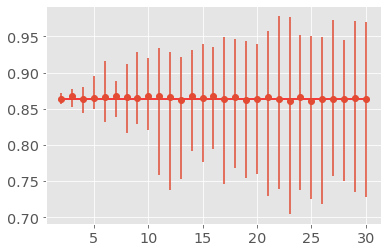

In [46]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# create the dataset
def get_dataset(n_samples=1000):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model

# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

## Results & Discussion

### The gill color chart clearly supports the professor's claim about black gilled mushrooms. Additionally, odor attribute provided indicators of inediblity. I also thought cap color would be a better indicator.  Lastly, the habitiat data was interesting. I would have thought more specimens in the woods would have been edible.

## Conclusion & Summary

### Avoid black gilled, off-smelling mushrooms if you see them.  This project was interesting and I will take what I have learned the next time I go mushroom foraging. 

## Limitations & Later Work

### I am new user of scikit learn. My lack of knowledge on the classification model forced me to do work that was on my level of understand.  I want to develop better understanding of the tool to develop better insights for this dataset. I would have liked to understand whether a combination of attributes would improve consumbability accuracy.

## References & Contribution

### Origin: Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf Donor: Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)